In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [4]:
# Upload and read the CSV
df = pd.read_csv("/content/Airline_Delay_Cause.csv")

# Remove unwanted spaces in column names
df.columns = df.columns.str.strip()

# Show first 5 rows
df.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,4,G4,Allegiant Air,SCK,"Stockton, CA: Stockton Metro",32.0,6.0,0.73,0.59,...,0.00,2.72,0.0,0.0,169.0,46.0,10.0,50.0,0.0,63.0
1,2025,4,G4,Allegiant Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",50.0,20.0,2.90,0.36,...,1.00,10.21,0.0,0.0,1382.0,93.0,8.0,454.0,193.0,634.0
2,2025,4,G4,Allegiant Air,SFB,"Sanford, FL: Orlando Sanford International",885.0,285.0,54.15,13.07,...,0.21,171.47,1.0,0.0,20506.0,5460.0,1297.0,1980.0,8.0,11761.0
3,2025,4,G4,Allegiant Air,SGF,"Springfield, MO: Springfield-Branson National",67.0,11.0,2.58,0.46,...,0.00,5.86,0.0,3.0,718.0,217.0,43.0,122.0,0.0,336.0
4,2025,4,G4,Allegiant Air,SHV,"Shreveport, LA: Shreveport Regional",8.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Create delay_status: 1 if delayed, 0 if not
df["delay_status"] = df["arr_del15"].apply(lambda x: 1 if x > 0 else 0)

# Preview
df[["arr_del15", "delay_status"]].head()


,arr_del15,delay_status
0,6.0,1
1,20.0,1
2,285.0,1
3,11.0,1
4,0.0,0


In [7]:
# Select useful columns
features = ['year', 'month', 'carrier', 'airport', 'arr_flights', 'arr_cancelled', 'arr_diverted']

X = df[features]
y = df["delay_status"]


In [8]:
# One-hot encode carrier and airport
X_encoded = pd.get_dummies(X, columns=['carrier', 'airport'], drop_first=True)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.972972972972973

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.21      0.31        42
           1       0.98      0.99      0.99      1475

    accuracy                           0.97      1517
   macro avg       0.75      0.60      0.65      1517
weighted avg       0.97      0.97      0.97      1517



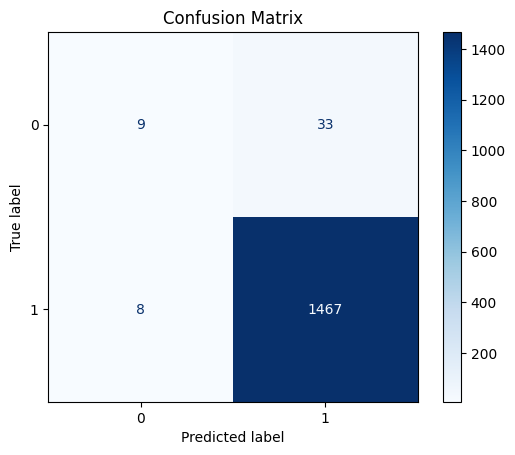

In [11]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Show confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


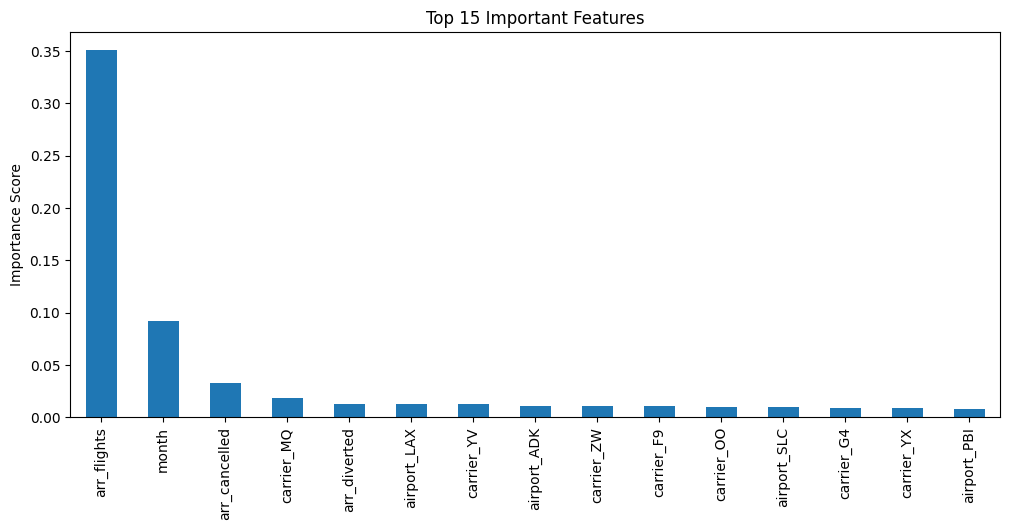

In [12]:
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X_encoded.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 5))
feat_importances.head(15).plot(kind='bar')
plt.title("Top 15 Important Features")
plt.ylabel("Importance Score")
plt.show()
